In [28]:
import numpy as np
import pandas as pd
import os

In [29]:
df = pd.read_csv('C:/Users/VIDHI/Desktop/DeepLearning/dataset/Churn_Modelling.csv')

In [30]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [32]:
df.duplicated().sum()

0

In [33]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [34]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [35]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [36]:
df.drop(columns=['RowNumber' , 'CustomerId' , 'Surname'] , inplace = True)

In [37]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df = pd.get_dummies(df,columns = ['Geography' , 'Gender'] , drop_first = True)

In [39]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [40]:
X = df.drop(columns = ['Exited'] )
y=df['Exited']

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.2 , random_state =41 )

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Input


In [43]:
model = Sequential()

model.add(Dense( 11 , activation = 'relu' , input_dim =11))
model.add(Dense( 11 , activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


C:\Users\VIDHI\vivoCONDA\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'Adam' , metrics=['accuracy'] )

In [46]:
history = model.fit(X_train_scaled , y_train , epochs =100 , validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7642 - loss: 0.5357 - val_accuracy: 0.7987 - val_loss: 0.4678
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8073 - loss: 0.4546 - val_accuracy: 0.8163 - val_loss: 0.4350
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8159 - loss: 0.4338 - val_accuracy: 0.8231 - val_loss: 0.4220
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8223 - loss: 0.4208 - val_accuracy: 0.8313 - val_loss: 0.4115
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8263 - loss: 0.4108 - val_accuracy: 0.8381 - val_loss: 0.4017
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.4010 - val_accuracy: 0.8425 - val_loss: 0.3905
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8366 - loss: 0.3926 - val_accuracy: 0.8475 - val_loss: 0.3837
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8420 - loss: 0.3850 - val_accu

In [47]:
model.layers[0].get_weights()

[array([[-0.13067912, -0.08226144, -0.28380224, -0.03327593,  0.92590624,
          0.28041977, -0.12948   , -0.10204447,  0.0843269 ,  0.29414627,
         -0.12253204],
        [-0.14202933,  0.15750884,  0.76041836, -0.35947508,  0.07932759,
          1.4936852 , -0.44021204, -0.4865216 , -0.26729438, -0.0207637 ,
          0.3893073 ],
        [-0.0694233 , -0.04034476,  0.16703475,  0.01589072, -0.30887064,
         -0.07643897,  0.03641677, -0.16429682, -0.13266802, -0.07858413,
          0.17373012],
        [ 0.33704653,  0.5135571 , -0.11790731, -0.07790602, -0.484652  ,
         -0.14075239,  0.13590485,  0.1551083 , -0.1165145 , -0.5002203 ,
         -0.06598841],
        [-0.9920151 ,  0.8776064 , -0.5228667 ,  0.20292188,  0.05766626,
          0.06228722, -0.02000972, -0.15096447,  1.1912676 , -1.043348  ,
          0.01636664],
        [-0.08197818, -0.01357241,  0.26484138, -0.24002202, -0.08394207,
         -0.05810924,  0.38681537,  0.21347906,  0.02654406, -0.0105395

In [48]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [49]:
y_pred = np.where(y_log>0.5 , 1,0)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.868

In [51]:
import matplotlib.pyplot as plt 

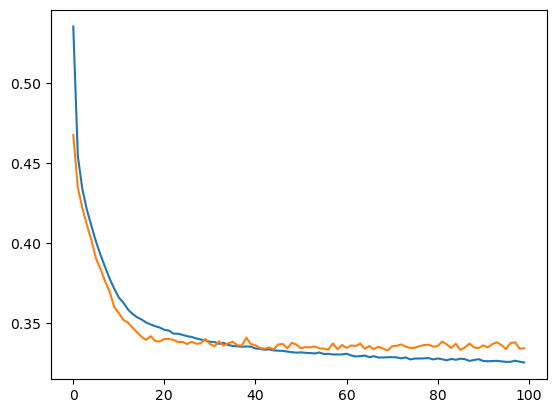

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


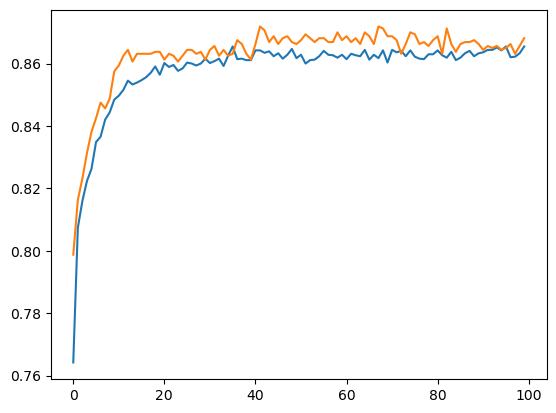

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
